# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Other measurements of performance

Recall that in the logistic regression case our function $G(x) \in [0,1]$ and represents the probability of the label being $1$, we then used the following rule to construct a decision function from this $G$, i.e. 
$$
    g(x) = 
    \begin{cases}
        1, & \text{if } G(x) > 1/2 \\
        0, & \text{otherwise.}
    \end{cases}
$$
The parameter $1/2$ can be changed in order to create a trade-off between precision and recall.

Lets consider the function
$$
    g_\alpha(x) = 
    \begin{cases}
        1, & \text{if } G(x) > \alpha \\
        0, & \text{otherwise.}
    \end{cases}
$$
where $\alpha \in [0,1]$, then for each such $\alpha$ we get a precision and recall, i.e.
$$
    \begin{aligned}
        \text{Precision:} \quad \text{Pr}(\alpha) =  P(Y = 1 \mid g_\alpha(X) = 1) \\
        \text{Recall:} \quad \text{Re} (\alpha) = P(g_\alpha(X) = 1 \mid Y = 1).
    \end{aligned}
$$

These functions can be plotted as functions of $\alpha$, we can see that below

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

from sklearn.svm import SVC

labels = digits['target'] >= 5

X = digits['data']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,labels)

per = SVC(kernel='linear',probability=True)

per.fit(X_train,Y_train)

SVC(kernel='linear', probability=True)

In [2]:
per_rbf = SVC(kernel='rbf',probability=True)

per_rbf.fit(X_train,Y_train)

SVC(probability=True)

In [3]:
from Utils import classification_report_interval

In [5]:
print(classification_report_interval(Y_test,per.predict(X_test)))

            labels           precision             recall

             False  0.90 : [0.78,1.00] 0.89 : [0.77,1.00]
              True  0.89 : [0.76,1.00] 0.90 : [0.77,1.00]

          accuracy                                        0.90 : [0.81,0.98]



In [6]:
per.predict_proba(X_test)

array([[9.90051687e-01, 9.94831301e-03],
       [3.01809476e-01, 6.98190524e-01],
       [5.76679256e-07, 9.99999423e-01],
       [9.82515321e-01, 1.74846788e-02],
       [9.30072077e-01, 6.99279230e-02],
       [9.83040043e-01, 1.69599573e-02],
       [7.49735222e-01, 2.50264778e-01],
       [8.94943603e-03, 9.91050564e-01],
       [1.36280074e-01, 8.63719926e-01],
       [9.59489216e-01, 4.05107838e-02],
       [5.00000000e-01, 5.00000000e-01],
       [7.77211274e-01, 2.22788726e-01],
       [4.76101829e-01, 5.23898171e-01],
       [8.02243638e-03, 9.91977564e-01],
       [1.65191348e-01, 8.34808652e-01],
       [9.99631349e-01, 3.68650998e-04],
       [9.64877116e-01, 3.51228835e-02],
       [6.61411737e-01, 3.38588263e-01],
       [9.96350212e-01, 3.64978753e-03],
       [1.24637803e-02, 9.87536220e-01],
       [1.91119875e-01, 8.08880125e-01],
       [9.94925608e-01, 5.07439173e-03],
       [9.71384669e-01, 2.86153314e-02],
       [9.95178976e-01, 4.82102400e-03],
       [1.076894

In [7]:
from sklearn.metrics import precision_recall_curve
prec,rec,thresh = precision_recall_curve(Y_test,per.predict_proba(X_test)[:,1])
prec_rbf,rec_rbf,thresh_rbf = precision_recall_curve(Y_test,per_rbf.predict_proba(X_test)[:,1])

### Tradeoff between precision and recall

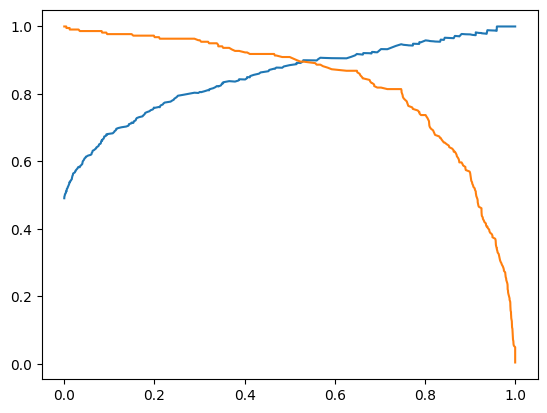

In [8]:
import matplotlib.pyplot as plt
plt.plot(thresh,prec[:-1])
plt.plot(thresh,rec[:-1])

### Precision and recall curve

It is customary to plot the precision as a function of recall into the so called precision and recall curve

(0.0, 1.0)

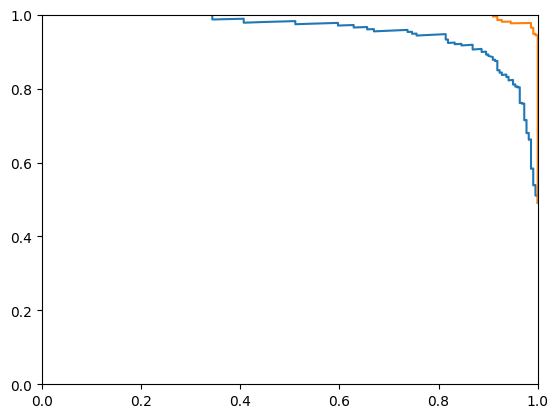

In [9]:
plt.plot(rec,prec)
plt.plot(rec_rbf,prec_rbf)
plt.xlim(0,1)
plt.ylim(0,1)

### Average precision
$$
    p(r) = \text{Pr}(\text{Re}^{-1}(r))
$$
then $p(r)$ is the curve above where the $x$-axis is $r$ (recall) and the $y$ axis is precision.
Average precision is thus just
$$
    \text{AP} = \int_0^1 p(r) dr
$$
or also called Area Under the Precision Recall Curve.

If we call $\mathbb{P}(g_\alpha(X) = 1) = t$, the detection level, where $t(1) = 0$ and $t(0) = 1$. Then
$$
    p(t) = \text{Pr}(\alpha) = \mathbb{P}(Y=1 \mid g_\alpha(X)=1) = Re(\alpha) \frac{\mathbb{P}(Y = 1)}{\mathbb{P}(g_\alpha(X) = 1)}
$$
and
$$
    r(t) = \text{Re}(\alpha)
$$
then we get
$$
    p(t) = \frac{\mathbb{P}(Y = 1) r(t)}{t}
$$

This equation captures the trade-off between precision and recall as functions of the detection level.

It may look like average precision is a strange quantity, and indeed it is. See for instance the review paper on the course website.

In [10]:
from sklearn.metrics import average_precision_score
average_precision_score(Y_test,per.predict_proba(X_test)[:,1])

0.9558927361886067

In [11]:
average_precision_score(Y_test,per_rbf.predict_proba(X_test)[:,1])

0.9979075740393013

### Reciever Operating Characteristic (ROC)

Lets consider Recall for the $0$ class vs Recall for the $1$ class
$$
    \text{FPR}(\alpha) = \mathbb{P}(g(X)=1 \mid Y = 0) \quad \text{also goes by the name false positive rate}
$$
$$
    \text{Re}(\alpha) = \mathbb{P}(g(X)=1 \mid Y = 1) \quad \text{also goes by the name true positive rate}
$$

We can plot these using sklearn as follows

In [12]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(Y_test,per.predict_proba(X_test)[:,1])
fpr_rbf,tpr_rbf,thresholds_rbf = roc_curve(Y_test,per_rbf.predict_proba(X_test)[:,1])

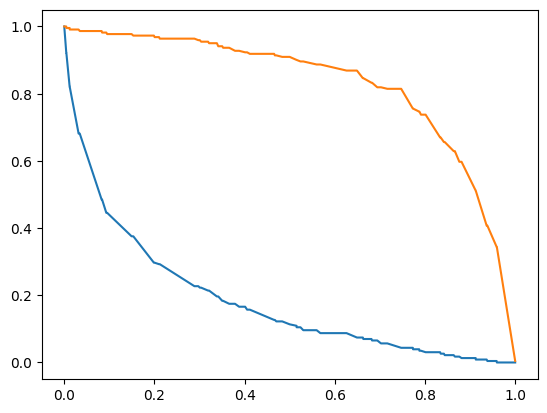

In [13]:
plt.plot(thresholds,fpr)
plt.plot(thresholds,tpr)

However more common is to consider plotting them against eachother

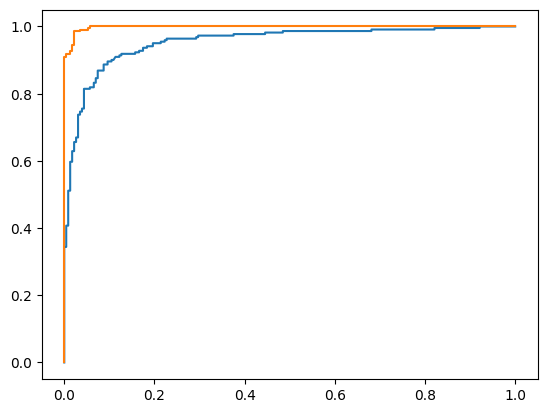

In [14]:
plt.plot(fpr,tpr)
plt.plot(fpr_rbf,tpr_rbf)

This is the plot of $\text{Re}(\text{FPR}^{-1}(r))$.

There is also the AUC, which is Area Under the Curve, which is defined as
$$
    \int_0^1 \text{Re}(\text{FPR}^{-1}(r)) dr = -\int_0^1 \text{Re}(\alpha) \text{FPR}'(\alpha) d\alpha
$$

Both the AP (Average Precision) and the (AUC) is used as a single performance metric of a classifier.

Let $Z = G(X)$, where $G$ is the predicted probability, then $Z$ has density $F_Z$. Let $F_{Z,Y}$ be the joint distribution of $Z$ and $Y$

Let
$$
    \begin{aligned}
        f_1(z) &= f_{Z \mid Y=1} \\
        f_0(z) &= f_{Z \mid Y=0}
    \end{aligned}
$$
thus we simply get
$$
    \begin{aligned}
        \text{FPR}(\alpha) = \int_{\alpha}^1 f_0(z)dz \\
        \text{Re}(\alpha) = \int_{\alpha}^1 f_1(z)dz
    \end{aligned}
$$
As such 
$$
    \text{Re}'(\alpha) = -f_1(\alpha)
$$
and we can write
$$
    -\int_0^1 \text{Re}(\alpha) \text{FPR}'(\alpha) d\alpha = \int_0^1 \int_z^1 f_1(z') f_0(z) dz dz'
$$
Consider $Z_1$ be a random variable sampled from $f_1$ and $Z_0$ be sampled from $f_0$. Then we can write the above as
$$
    \mathbb{P}(Z_1 > Z_0) = \int_0^1 \int_z^1 f_1(z') f_0(z) dz dz'
$$
It is useful to think about what this probability means. That is, if we take a randomly chosen sample from the positive class and call it $X_1$ and do the same with class $0$ and call that $X_0$, then the AUC is the probability that $G(X_1) > G(X_0)$.